**chap03_2_Project_回归_利用回归模型预测汽油消耗量**

**案例描述**
> + James一直开着同一辆车，而且几乎总是采用相同的路线。 他在加油站喜欢改变使用的汽油类型： 在SP98和SP95 E10之间转换。 
> + E10的售价为1.38欧元/每升; SP98的售价为1.46欧元/每升。根据经验，车用E10汽油时消耗的油更多。
> + 本案例要求基于以下数据，**根据汽油类型预测消耗量。**

**数据描述**
> +  1.样本数：388
> +  2.特征数量：11个特征，1个目标特征（即consume，消耗量（L / 100km））。 

| 列名          	| 说明                   	|
|---------------	|------------------------	|
| distance      	| 行车距离（km）         	|
| consume       	| 消耗量（L / 100km）    	|
| speed         	| 平均速度（km / h）     	|
| temp_inside   	| 车内温度（°C）         	|
| temp_outside  	| 车外温度（°C）         	|
| specials      	| 是否发生了什么特别的事 	|
| gas_type      	| 使用的汽油类型         	|
| AC            	| 是否开空调             	|
| rain          	| 是否下雨               	|
| sun           	| 是否阳光明媚           	|
| refill_liters 	| 补充的公升             	|
| refill_gas    	| 补充的汽油类型         	|

<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.-读取数据" data-toc-modified-id="1.-读取数据-0.1">1. 读取数据</a></span></li><li><span><a href="#2.-数据预处理" data-toc-modified-id="2.-数据预处理-0.2">2. 数据预处理</a></span><ul class="toc-item"><li><span><a href="#2.1-缺失值检测与处理" data-toc-modified-id="2.1-缺失值检测与处理-0.2.1">2.1 缺失值检测与处理</a></span></li><li><span><a href="#2.2-类别特征的数值编码" data-toc-modified-id="2.2-类别特征的数值编码-0.2.2">2.2 类别特征的数值编码</a></span></li><li><span><a href="#2.3-各特征相关性分析" data-toc-modified-id="2.3-各特征相关性分析-0.2.3">2.3 各特征相关性分析</a></span></li></ul></li><li><span><a href="#3.-建立模型并评估" data-toc-modified-id="3.-建立模型并评估-0.3">3. 建立模型并评估</a></span></li><li><span><a href="#3.1-线性回归" data-toc-modified-id="3.1-线性回归-0.4">3.1 线性回归</a></span></li><li><span><a href="#3.2-LASSO" data-toc-modified-id="3.2-LASSO-0.5">3.2 LASSO</a></span></li><li><span><a href="#3.2-岭回归" data-toc-modified-id="3.2-岭回归-0.6">3.2 岭回归</a></span></li><li><span><a href="#3.3-K近邻回归" data-toc-modified-id="3.3-K近邻回归-0.7">3.3 K近邻回归</a></span></li><li><span><a href="#3.4-决策树回归" data-toc-modified-id="3.4-决策树回归-0.8">3.4 决策树回归</a></span></li></ul></li><li><span><a href="#4-小结" data-toc-modified-id="4-小结-1">4 小结</a></span></li></ul></div>

## 1. 读取数据

In [1]:
# 导入基本库
import numpy as np 
import pandas as pd

In [2]:
# 设置pd最大显示行数为20
pd.set_option("display.max_rows",20)

In [3]:
## 读取数据
file_path = './dataSets/data_chap3/measurements.xlsx'
df = pd.read_excel(file_path)
## 查看数据前5行
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [4]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [5]:
## 查看数据集的info基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null float64
consume          388 non-null float64
speed            388 non-null int64
temp_inside      376 non-null float64
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill_liters    13 non-null float64
refill_gas       13 non-null object
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


↑♎：分析有无缺失，各特征类型？

## 2. 数据预处理

### 2.1 缺失值检测与处理

In [6]:
#flase is 0
#true is 1
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

In [7]:
# 统计缺失值数量，并按降序排序
df.isnull().sum().sort_values(ascending=False)

refill_gas       375
refill_liters    375
specials         295
temp_inside       12
sun                0
rain               0
AC                 0
gas_type           0
temp_outside       0
speed              0
consume            0
distance           0
dtype: int64

↑♎：`refill_liters`,`refill_gas`,  `specials`缺失值很多，若补全对预测起不到任何效果，故删去这些特征。

In [8]:
#原地删除'refill_gas','refill_liters','specials'特征 
#inplace=True原地删除
df.drop(['refill_gas','refill_liters','specials'],axis=1,inplace=True)

而对于`temp_inside`特征，可以使用均值对其进行插补。

In [9]:
# 导入Imputer
from sklearn.preprocessing import Imputer

In [10]:
# 查看sklearn的版本
import sklearn
sklearn.__version__

'0.21.3'

> **缺失值（NaN）处理**：
>> + `from sklearn.preprocessing import Imputer`
>> + `from sklearn.impute import SimpleImputer   # 0.22后的版本 ` 

In [11]:
# 缺失值插补
## S0: 导入SimpleImputer
from sklearn.impute import SimpleImputer

In [12]:
SimpleImputer?

In [13]:
# 对特征df[["temp_inside"]]进行缺失值填充
## s1: 构建模型
imp = SimpleImputer(missing_values=np.nan,strategy="mean")
## s2: 训练
imp.fit(df[["temp_inside"]])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [14]:
## s3: 使用训练好的模型进行数据transform，添加新特征'age_imputed'
df["temp_inside_imputed"] = imp.transform(df[["temp_inside"]])

In [15]:
df[df["temp_inside"].isnull()][['temp_inside','temp_inside_imputed']]

,temp_inside,temp_inside_imputed
93,NaN,21.929521
95,NaN,21.929521
97,NaN,21.929521
98,NaN,21.929521
99,NaN,21.929521
100,NaN,21.929521
102,NaN,21.929521
201,NaN,21.929521
203,NaN,21.929521
261,NaN,21.929521


In [16]:
# 显示原年龄缺失的行在插补缺失值之后的情况
df["temp_inside"].head()

0    21.5
1    21.5
2    21.5
3    21.5
4    21.5
Name: temp_inside, dtype: float64

In [17]:
# drop掉"temp_inside"
df = df.drop("temp_inside",axis=1)

In [18]:
# 再次查看info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
distance               388 non-null float64
consume                388 non-null float64
speed                  388 non-null int64
temp_outside           388 non-null int64
gas_type               388 non-null object
AC                     388 non-null int64
rain                   388 non-null int64
sun                    388 non-null int64
temp_inside_imputed    388 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


↑♎：没有缺失值了

In [19]:
df.sample(5)

,distance,consume,speed,temp_outside,gas_type,AC,rain,sun,temp_inside_imputed
358,6.1,5.0,33,24,SP98,0,0,1,22.0
45,2.0,9.9,21,4,SP98,0,0,0,21.5
326,15.4,4.5,43,24,E10,0,0,0,22.0
342,15.4,3.8,47,24,E10,0,0,0,22.0
283,32.1,4.5,50,16,SP98,0,0,0,22.0


In [20]:
df["gas_type"].unique()

array(['E10', 'SP98'], dtype=object)

In [21]:
df["gas_type"].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

↓为了方便后续数据处理，将特征名称'temp_inside_imputed'改成'temp_inside'

In [22]:
# 为了后续使用方便，把`temp_inside_imputed`改成"temp_inside"
df = df.rename({'temp_inside_imputed':'temp_inside'},axis=1)

In [23]:
# 采用`df.rename()`改名
df.rename(____________,axis='columns')

NameError: name '____________' is not defined

In [24]:
# 再次随机查看5行样本
df.sample(5)

,distance,consume,speed,temp_outside,gas_type,AC,rain,sun,temp_inside
116,11.8,5.1,26,4,SP98,0,1,0,23.0
64,12.4,5.4,24,7,SP98,0,0,0,21.5
332,4.8,4.7,26,18,E10,0,0,0,25.0
355,4.5,5.2,23,23,SP98,0,0,1,22.0
74,11.6,5.0,25,6,SP98,0,0,0,21.5


### 2.2 类别特征的数值编码
> 接下来我们需要对特征`gas_type`进行数值编码，首先观察特征的可能取值。

In [25]:
# 统计特征"gas_type"中的类别及每个类别中样本的数量
df["gas_type"].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

↑♎分析：一共两类

然后用Pandas中的`get_dummies`函数对汽油类型进行One-Hot编码。

In [26]:
pd.get_dummies??

In [27]:
# 进行哑变量转换，得到新的DF，df_new
df_new = pd.get_dummies(df, ['get_type'])
## 观察数据的前3行
df_new.head(3)

,distance,consume,speed,temp_outside,AC,rain,sun,temp_inside,get_type_E10,get_type_SP98
0,28.0,5.0,26,12,0,0,0,21.5,1,0
1,12.0,4.2,30,13,0,0,0,21.5,1,0
2,11.2,5.5,38,15,0,0,0,21.5,1,0


### 2.3 各特征相关性分析
> 利用相关系数热图来初步观察特征之间的相关关系。

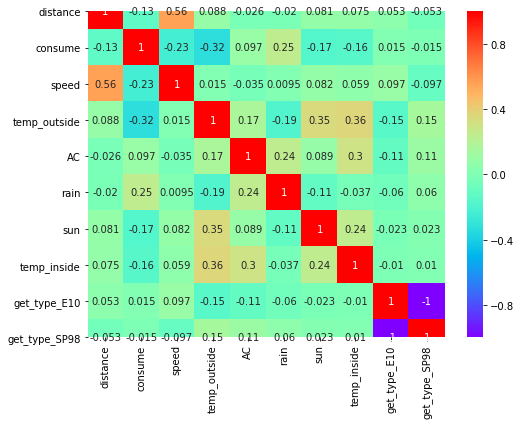

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,6))
# 求df_new各个特征间的相关系数
corr_ = df_new.corr()
# 绘制热力图
sns.heatmap(corr_, annot=True, cmap='rainbow')

↑♎分析：从图中可以看到:
> + 是否下雨和汽油消耗量有较为明显的正相关关系，
> + 平均速度与车外温度与汽油消耗量有较为明显的负相关关系。

## 3. 建立模型并评估
> + 下面尝试建立不同的回归模型并评估其效果
> + 首先分离特征`X`和目标`y`
> + 然后分割训练集和测试集，80%作为训练集，20%作为测试集。

In [29]:
## 将目标y与特征数据分离X，目标y为特征'consume'
X = df_new.drop(['consume'],axis=1)  # 注意参数axis="columns"或1
y = df_new['consume']

In [30]:
# 使用train_test_split划分train和test，
## 导入train_test_split
from sklearn.model_selection import train_test_split
## 划分train和test,比例为8:2,random_state=10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [31]:
X_train.head()

,distance,speed,temp_outside,AC,rain,sun,temp_inside,get_type_E10,get_type_SP98
345,16.0,42,15,0,0,0,22.0,1,0
331,21.5,47,27,1,0,1,25.0,1,0
10,12.4,42,4,0,0,0,21.5,1,0
76,11.8,39,6,0,0,0,21.5,0,1
149,36.9,52,5,0,0,0,21.5,1,0


In [32]:
y_train.head()

345    4.0
331    4.8
10     5.6
76     4.5
149    4.8
Name: consume, dtype: float64

## 3.1 线性回归
> 先建立线性回归模型，并使用测试集上的均方误差`mean_squared_error`和决定系数`r2`来评估模型效果。

In [33]:
#S0:导入LinearRegression和mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#S1:构建模型
lr = LinearRegression()
#S2: 构建训练
lr.fit(X_train,y_train)
#S3: 模型预测
lr_pred = lr.predict(X_test)
#S4: 模型评价
##S4_1: 测试集均方误差
print("测试集均方误差:", mean_squared_error(y_test, lr_pred)) 

##S4_2: 测试集决定系数
print("测试集决定系数:", lr.score(X_test, y_test))

测试集均方误差: 0.9357889428317326
测试集决定系数: 0.16191220282070262


↑♎分析：根据上面的数据可知：
> 线性回归的效果并不好，下面尝试引入正则化项，看看是否可以提高预测效果。

## 3.2 LASSO
> + LASSO有个超参--正则化强度`alpha`需要设置

In [34]:
# 导入Lasso
from sklearn.linear_model import Lasso

## 建立正则化强度列表，即使用不同的正则化参数建立模型并评估模型
alpha_grid = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1]

## 获得不同alpha下的决定系数,将结果以列表形式保存
result_R2 = [Lasso(alpha=item).fit(X_train, y_train).score(X_test,y_test) for item in alpha_grid]

## 将以上r2构建DF，index=alpha_grid,columns=['R^2']
lasso_result_R2 = pd.DataFrame(result_R2, index=alpha_grid, columns=['R^2'])
lasso_result_R2.index.name = 'alpha'
print(lasso_result_R2)

            R^2
alpha          
0.001  0.158191
0.010  0.128420
0.050  0.080821
0.100  0.068245
0.200  0.069297
0.500  0.073095
1.000  0.071893


↑♎分析：根据上面的数据可知：
> 随着`alpha`的增大，决定系数在不断降低，且LASSO模型的整体效果不如线性回归。

## 3.2 岭回归
> + Ridge 也有个超参--正则化强度`alpha`需要设置

In [35]:
# SO:导入Ridge
from sklearn.linear_model import Ridge

## 继续使用上面的alpha_grid建立不同模型并评估
alpha_grid = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1]

## 获得不同alpha下的决定系数
result_R2 = [Ridge(alpha=item).fit(X_train,y_train).score(X_test,y_test) for item in alpha_grid]
## 将以上r2构建DF，index=alpha_grid,columns=['R^2']
ridge_result_R2 = pd.DataFrame(result_R2, index=alpha_grid, columns=['R^2'])
ridge_result_R2.index.name = 'alpha'
print(ridge_result_R2)

            R^2
alpha          
0.001  0.161910
0.010  0.161891
0.050  0.161804
0.100  0.161697
0.200  0.161483
0.500  0.160845
1.000  0.159800


↑♎分析：根据上面的数据可知：
> + 随着`alpha`的增大，决定系数也在不断降低，且岭回归模型的效果也不如线性回归，说明线性回归拟合的模型不存在过拟合,而是有可能存在欠拟合
> + 下面尝试使用非线性回归的方法来建模。

## 3.3 K近邻回归
> + 试试使用K近邻回归是否可以得到一个效果更好的模型。
> + 对于K近邻，有个超参数`n_neighbors`，需要做一个选择，选择一个在测试集上表现最好的来建模。

In [39]:
# SO：导入KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

## 创建一个包含不同K取值的列表
K_grid = [1, 2, 3, 4, 5, 6, 7, 8]

## 获得不同K下的决定系数
result_R2 = [KNeighborsRegressor(n_neighbors=item).fit(X_train,y_train).score(X_test,y_test) for item in K_grid]
## 将以上r2构建DF，index=K_grid,columns=['R^2']
knn_result_R2 = pd.DataFrame(result_R2, index=K_grid, columns=['R^2'])
knn_result_R2.index.name = 'K'
print(knn_result_R2)

        R^2
K          
1  0.438646
2  0.500189
3  0.589162
4  0.559723
5  0.528063
6  0.495322
7  0.491048
8  0.510957


↑♎分析：根据上面的数据可知：
> + 使用K近邻回归建模时，模型效果较线性回归而言提升了不少，
> + 且当参数K取3时，决定系数最高约为0.59。

## 3.4 决策树回归
> + 最后使用决策树回归，来看看是否还可以进一步提升模型的效果，
> + 首先我们不做任何参数设定，让树完全生长。

In [36]:
#SO: 导入DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#S1: 模型构建
DFR = DecisionTreeRegressor(random_state=10)
#S2: 模型训练 
DFR.fit(X_train,y_train)
#S3: 模型预测
y_pred_DFR = DFR.predict(X_test)
#S4: 模型评估
#S4-1:训练集决定系数                                  
print("训练集R^2: ", DFR.score(X_train,y_train))
#S4-1:测试集决定系数   
print("测试集R^2: ", DFR.score(X_test,y_test))

训练集R^2:  0.9980781456242872
测试集R^2:  0.17662679866043496


↑♎分析：根据上面的数据可知：
> + 训练集的决定系数很高但测试集的决定系数较低，说明模型存在过拟合现象;
> + 下面通过模型超参调`max_depth`,即通过调整树的深度来减轻过拟合的现象。

In [37]:
## 构建不同树深的列表
depth_grid = [1, 2, 3, 4, 5]

## 获得不同depth下的决定系数
result_R2 = [DecisionTreeRegressor(max_depth=d).fit(X_train,y_train).score(X_test,y_test) for d in depth_grid]
result_R2

[0.41689526255911746,
 0.4146056507921598,
 0.4455252661215399,
 0.4075468289663944,
 0.33193530291816953]

In [38]:
## 将以上r2构建DF，index=depth_grid,columns=['R^2']
DFR_result_R2 = pd.DataFrame(result_R2,index=depth_grid,columns=['R^2'])
DFR_result_R2.index.name = 'depth'
DFR_result_R2

,R^2
depth,
1,0.416895
2,0.414606
3,0.445525
4,0.407547
5,0.331935


↑♎分析：根据上面的数据可知：
> + 限定树的深度后，测试集的决定系数有所上升，证明过拟合现象有所减轻;
> + 但整体的效果不如K近邻回归，其中树的深度为3时模型在测试集上的效果最佳;
> + 所以再令树的深度为3建立模型并输出此时各特征的重要性。

In [39]:
X.columns

Index(['distance', 'speed', 'temp_outside', 'AC', 'rain', 'sun', 'temp_inside',
       'get_type_E10', 'get_type_SP98'],
      dtype='object')

In [40]:
#S1: 模型构建,参数：max_depth=3,random_state=10
DFR3 = DecisionTreeRegressor(max_depth=3)
#S2: 模型训练
DFR3.fit(X_train, y_train)
#S3: 模型预测

## 使用各特征的重要性系数构建一个Series,index=X_train.columns,并降序排序
features_importances = pd.Series(DFR3.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(features_importances)

distance         0.820998
temp_outside     0.177857
rain             0.001145
get_type_SP98    0.000000
get_type_E10     0.000000
temp_inside      0.000000
sun              0.000000
AC               0.000000
speed            0.000000
dtype: float64


↑♎分析：根据上面的数据可知：
> + 可以看出`distance`(行车距离)和`temp_outside`（车外温度）较为重要。
> + 最后我们对建立的决策树模型进行可视化。

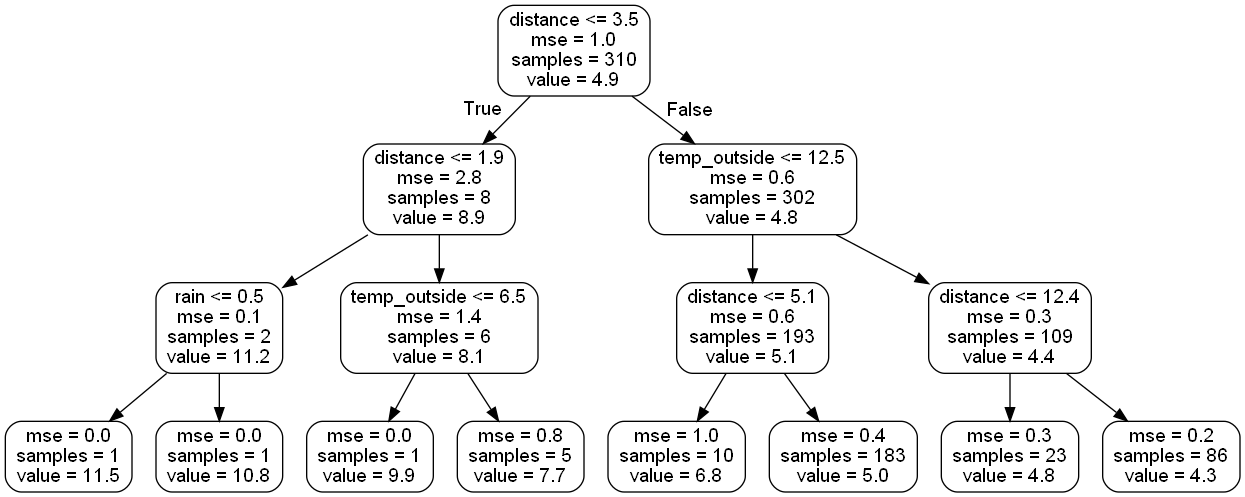

In [41]:
# 决策树可视化
## 导入必要库
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image 
import pydotplus

## 输出图片到dot文件
export_graphviz(DFR3, out_file='tree.dot', 
                feature_names=X_train.columns,
                rounded=True, precision = 1)

## 使用dot文件构造图
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# 4 小结
> + 我们对数据建立了不同的回归模型，发现线性模型效果不佳，所以通过不同方法间的比较，选择了非线性的方法建立了K近邻回归模型来预测汽油消耗量。

**后记：**
> + 模块版本问题`from sklearn.externals.six import StringIO`无法导入
> + `sklearn.externals.six` 模块在 `scikit-learn 0.23` 及以后的版本已经被删除。


In [ ]:
import sklearn

In [ ]:
sklearn.__version__

sklearn.externals.six 模块在 scikit-learn 0.23 及以后的版本已经被删除。

解决方法一
无需降级 scikit-learn。直接安装six包：
pip install six
然后直接引入即可：
from six import StringIO


In [ ]:
!pip install six

In [ ]:
from six import StringIO

In [ ]:
!c:\programdata\anaconda3\python.exe -m pip install --upgrade pip

In [ ]:
#作业：自己绘制混淆矩阵